## Introduction: Environment temperature change
About the dataset: 

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by area, with annual updates. The current dissemination covers the period 1961–2019

Sources and links:
- Publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS)
- Kaggle: https://www.kaggle.com/datasets/sevgisarac/temperature-change

Processed: No

Sample: 284 different areas resulting in 9656 observations (on temperature change and its std, 4828 observations each)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
df = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding="latin1")

## Splitting and describing data

### Splitting, and processing data, and uploading it to different csv's 

In [ ]:
df_temp = df[df["Element"] == "Temperature change"].drop(columns=["Element Code", "Element", "Unit"])

df_temp_melted = df_temp.melt(id_vars=["Area Code", "Area", "Months Code", "Months"], var_name="Year", value_name="Temperature Change")

df_temp_melted["Year"] = df_temp_melted["Year"].str[1:].astype(int)

df_temp_melted = df_temp_melted[df_temp_melted["Months"].isin(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])]

df_temp_melted.to_csv("Splitted_data/temperatureChange.csv", index = False)

In [ ]:
df_std = df[df["Element"] == "Standard Deviation"].drop(columns=["Element Code", "Element", "Unit"])

df_std_melted = df_std.melt(id_vars=["Area Code", "Area", "Months Code", "Months"], var_name="Year", value_name="Standard Deviation")

df_std_melted["Year"] = df_std_melted["Year"].str[1:].astype(int)

df_std_melted = df_std_melted[df_std_melted["Months"].isin(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])]

df_std_melted.to_csv('Splitted_data/standardDeviationChange.csv', index = False)



### Describing data

#### Temperature change
Columns:
- Area Code (The numerical code of area column, type of area code is an integer)
- Area (Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object)
- Months Code (The numerical code of months column, type of months code is an integer)
- Months (Name of the month)
- Year
- Temperature Change (Celsius degrees °C, temperature change with respect to a baseline climatology, corresponding to the period 1951–1980)

Variable: Temperature Change (continuous type)

In [ ]:
df_temp_melted.head(5)

,Area Code,Area,Months Code,Months,Year,Temperature Change
0,2,Afghanistan,7001,January,1961,0.777
1,2,Afghanistan,7002,February,1961,-1.743
2,2,Afghanistan,7003,March,1961,0.516
3,2,Afghanistan,7004,April,1961,-1.709
4,2,Afghanistan,7005,May,1961,1.412


In [ ]:
dtd = df_temp_melted['Temperature Change'].describe()
dtd.to_csv('Described_parts/tempDesc.csv')
dtd

count    179792.000000
mean          0.486139
std           1.078654
min          -9.334000
25%          -0.094000
50%           0.419000
75%           1.011000
max          11.759000
Name: Temperature Change, dtype: float64

In [ ]:
dtad = df_temp_melted.groupby("Area")["Temperature Change"].describe()
dtad = dtad.reset_index()
dtad.to_csv('Described_parts/tempDescArea.csv')
dtad

,Area,count,mean,std,min,25%,50%,75%,max
0,Afghanistan,708.0,0.436037,1.399904,-7.722,-0.32725,0.4955,1.25800,4.725
1,Africa,708.0,0.492147,0.576287,-1.202,0.06500,0.4890,0.92100,2.412
2,Albania,708.0,0.485035,1.455122,-4.322,-0.45200,0.4765,1.43225,4.878
3,Algeria,708.0,0.716062,1.217751,-2.680,-0.18575,0.7175,1.57750,4.305
4,American Samoa,640.0,0.432105,0.671782,-2.114,-0.01550,0.3500,0.87525,3.557
...,...,...,...,...,...,...,...,...,...
279,World,708.0,0.525314,0.583313,-1.306,0.08975,0.4620,0.96425,2.624
280,Yemen,396.0,0.153053,0.571824,-1.380,-0.22000,0.1270,0.49700,2.461
281,Yugoslav SFR,372.0,0.019089,1.506353,-4.805,-0.85825,0.0335,0.84250,4.718
282,Zambia,707.0,0.451293,0.782068,-1.655,-0.11250,0.3790,0.92950,3.581


In [ ]:
dtyd = df_temp_melted.groupby("Year")["Temperature Change"].describe()
dtyd.to_csv('Described_parts/tempDescYear.csv')
dtyd.head()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1961,2931.0,0.133663,0.875213,-4.018,-0.30100,0.0520,0.435,5.771
1962,2937.0,-0.031264,0.838931,-5.391,-0.31200,-0.0330,0.288,4.366
1963,2927.0,-0.025384,1.067686,-8.483,-0.34050,0.0290,0.401,4.666
1964,2914.0,-0.129404,0.853397,-7.309,-0.50675,-0.1295,0.259,5.233
1965,2929.0,-0.211360,0.781282,-4.728,-0.54400,-0.1910,0.134,5.144


#### Standard Deviation
Columns:
- Area Code (The numerical code of area column, type of area code is an integer)
- Area (Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object)
- Months Code (The numerical code of months column, type of months code is an integer)
- Months (Name of the month)
- Year
- Standard Deviation (Std of temperature change with respect to a baseline climatology, corresponding to the period 1951–1980)

Variable: Stabdard Deviation (continuous type)

In [ ]:
df_std_melted.head(5)

,Area Code,Area,Months Code,Months,Year,Standard Deviation
0,2,Afghanistan,7001,January,1961,1.950
1,2,Afghanistan,7002,February,1961,2.597
2,2,Afghanistan,7003,March,1961,1.512
3,2,Afghanistan,7004,April,1961,1.406
4,2,Afghanistan,7005,May,1961,1.230


In [ ]:
dsd = df_std_melted['Standard Deviation'].describe()
dsd.to_csv('Described_parts/stdDesc.csv')
dsd

count    167141.000000
mean          0.731568
std           0.498434
min           0.142000
25%           0.387000
50%           0.562000
75%           0.950000
max           4.373000
Name: Standard Deviation, dtype: float64

In [ ]:
dsad = df_std_melted.groupby("Area")["Standard Deviation"].describe()
dsad.to_csv('Described_parts/stdDescArea.csv')
dsad

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Afghanistan,708.0,1.336000,0.528748,0.585,0.90550,1.3505,1.51300,2.597
Africa,708.0,0.357917,0.075138,0.292,0.30400,0.3150,0.38550,0.488
Albania,708.0,1.242667,0.286825,0.715,1.17900,1.2200,1.31025,1.939
Algeria,708.0,0.923333,0.286604,0.438,0.70175,0.9765,1.14000,1.362
American Samoa,640.0,0.390731,0.055634,0.322,0.33400,0.3840,0.42900,0.498
...,...,...,...,...,...,...,...,...
World,708.0,0.303250,0.113687,0.178,0.20775,0.2910,0.34900,0.580
Yemen,396.0,0.503508,0.066067,0.413,0.44900,0.4900,0.52500,0.658
Yugoslav SFR,372.0,1.485750,0.496196,0.770,1.25450,1.3680,1.69625,2.753


In [ ]:
dsyd = df_std_melted.groupby("Year")["Standard Deviation"].describe()
dsyd = dsyd.reset_index()
dsyd.to_csv('Described_parts/stdDescYear.csv',index=False,header=True)
dsyd.head()

,Year,count,mean,std,min,25%,50%,75%,max
0,1961,2919.0,0.732235,0.499325,0.142,0.38800,0.563,0.9500,4.373
1,1962,2937.0,0.730639,0.498293,0.142,0.38800,0.560,0.9490,4.373
2,1963,2927.0,0.731797,0.498749,0.142,0.38800,0.563,0.9495,4.373
3,1964,2912.0,0.731754,0.499616,0.142,0.38775,0.562,0.9490,4.373
4,1965,2917.0,0.732516,0.499393,0.142,0.38800,0.563,0.9500,4.373


## Analysis of temperature change

In [ ]:
global_avg = df_temp_melted.groupby("Year")["Temperature Change"].mean()
global_avg.to_csv('Described_parts/globalTempAvg.csv')

### Draw the global temperature change trend from 1961-2019

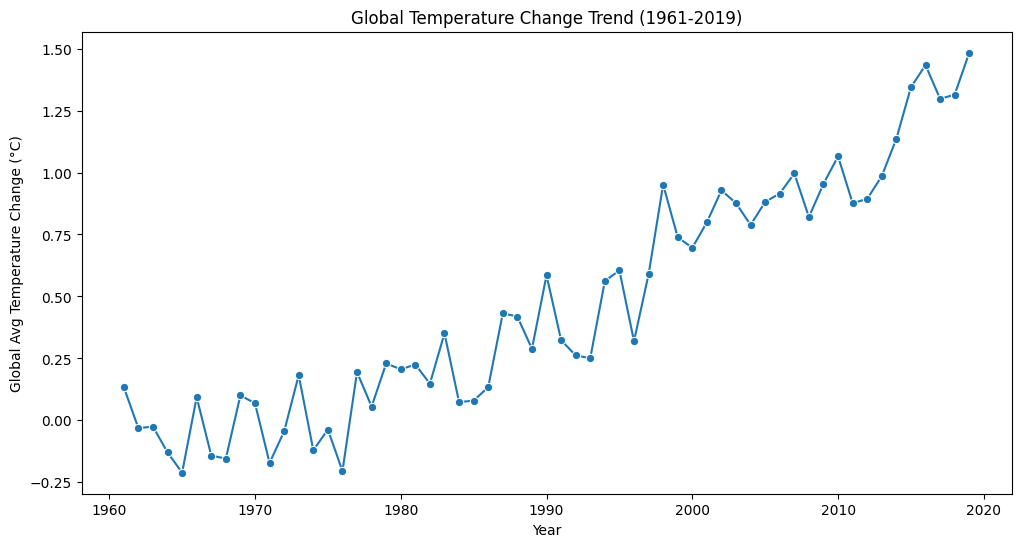

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_avg.index, y=global_avg.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Global Avg Temperature Change (°C)")
plt.title("Global Temperature Change Trend (1961-2019)")
plt.show()

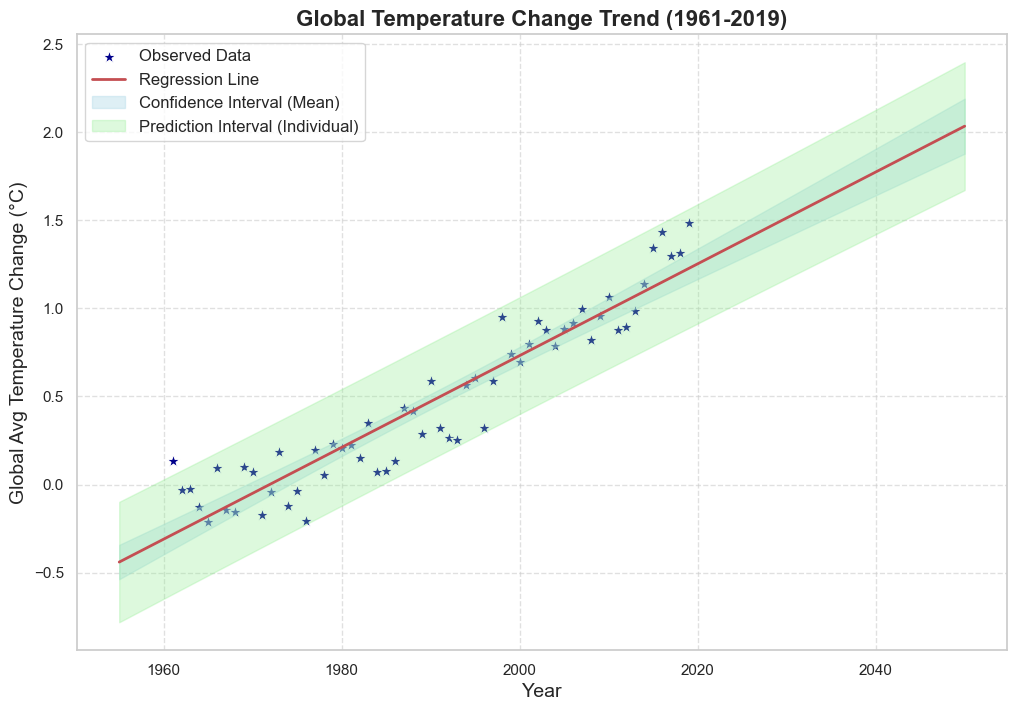

In [ ]:
x = global_avg.index  
y = global_avg.values  
lr = st.linregress(x, y)
fit = np.polyfit(x, y, 1)
poly = np.poly1d(fit)
x0 = np.linspace(1955, 2050, 100)  
hy0 = poly(x0)
v0 = (np.var(x) + (x0 - np.mean(x))**2) / (len(x) * np.var(x))
hy = lr.intercept + lr.slope * x
e = y - hy
sse = np.sum(e**2)
hs2 = sse / (len(x) - 2)
alpha = 0.05
t = st.t.ppf(1 - alpha / 2, len(x) - 2)
eps_mean = t * np.sqrt(hs2 * v0)
mean_l0 = hy0 - eps_mean
mean_up = hy0 + eps_mean
eps_pred = t * np.sqrt(hs2 * (1 + v0))
val_l0 = hy0 - eps_pred
val_up = hy0 + eps_pred
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x, y=y, marker='*', color='darkblue', label='Observed Data', s=100)
plt.plot(x0, poly(x0), 'r-', linewidth=2, label='Regression Line')
plt.fill_between(x0, mean_l0, mean_up, color='lightblue', alpha=0.4, label='Confidence Interval (Mean)')
plt.fill_between(x0, val_l0, val_up, color='lightgreen', alpha=0.3, label='Prediction Interval (Individual)')
plt.title('Global Temperature Change Trend (1961-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Avg Temperature Change (°C)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Tier-list of temp change by area

In [ ]:
tcm = df_temp_melted.groupby("Area")["Temperature Change"].mean().sort_values(ascending=False)
tcm.to_csv('Described_parts/tempAreaMeanTierList.csv')
tcm

Area
Serbia                         1.521940
Luxembourg                     1.494692
Montenegro                     1.493042
Estonia                        1.462247
Slovenia                       1.434408
                                 ...   
Falkland Islands (Malvinas)    0.023366
Yugoslav SFR                   0.019089
Midway Island                  0.010874
Pitcairn Islands              -0.018991
Nauru                         -0.115031
Name: Temperature Change, Length: 284, dtype: float64

### Draw the temperature change for each month

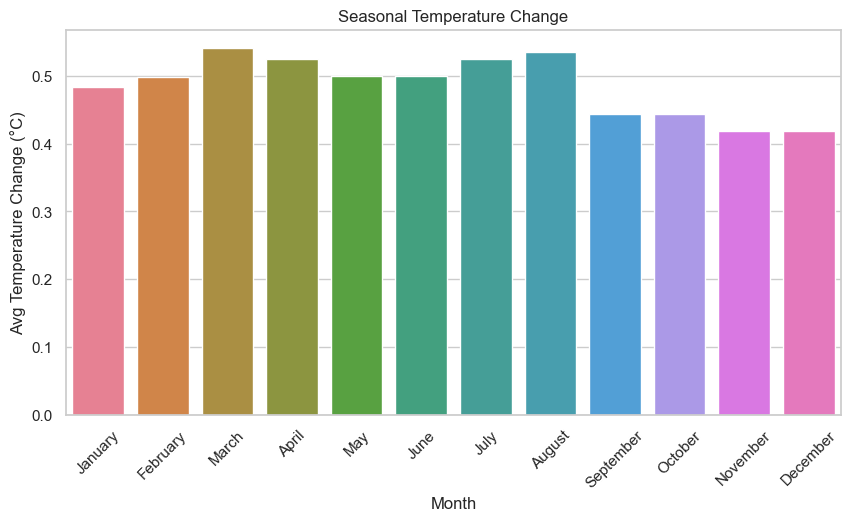

In [ ]:
seasonal_change = df_temp_melted.groupby("Months")["Temperature Change"].mean()
seasonal_change = seasonal_change.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_change.to_csv('Described_parts/globalTempChangeByMonth.csv',index_label="Month")
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_change.index, y=seasonal_change.values,hue=seasonal_change.index)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Avg Temperature Change (°C)")
plt.title("Seasonal Temperature Change")
plt.show()

### Winter vs summer trends

In [ ]:
winter_months = ["December", "January", "February"]
summer_months = ["June", "July", "August"]

winter_avg = df_temp_melted[df_temp_melted["Months"].isin(winter_months)]["Temperature Change"].mean()
summer_avg = df_temp_melted[df_temp_melted["Months"].isin(summer_months)]["Temperature Change"].mean()

print(f"Winter Avg Temp Change: {winter_avg:.2f}")
print(f"Summer Avg Temp Change: {summer_avg:.2f}")

Winter Avg Temp Change: 0.47
Summer Avg Temp Change: 0.52


## Analysis in the standard deviation of temperature

In [ ]:
global_avg_std = df_std_melted.groupby("Year")["Standard Deviation"].mean()
global_avg_std.to_csv('Described_parts/globalAvgStd.csv')

### Draw the global std trend from 1961-2019

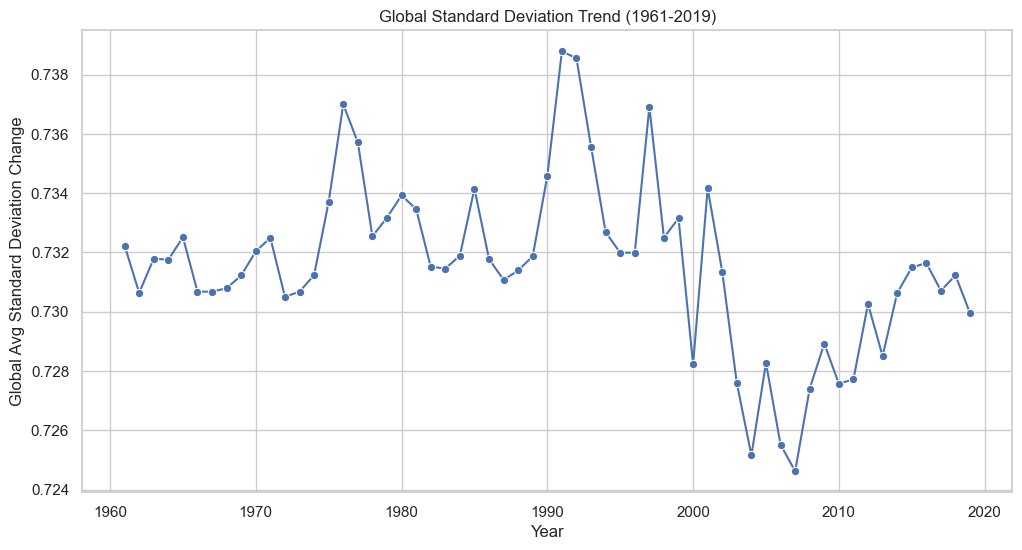

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_avg_std.index, y=global_avg_std.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Global Avg Standard Deviation Change")
plt.title("Global Standard Deviation Trend (1961-2019)")
plt.show()

### Draw the std change for each month

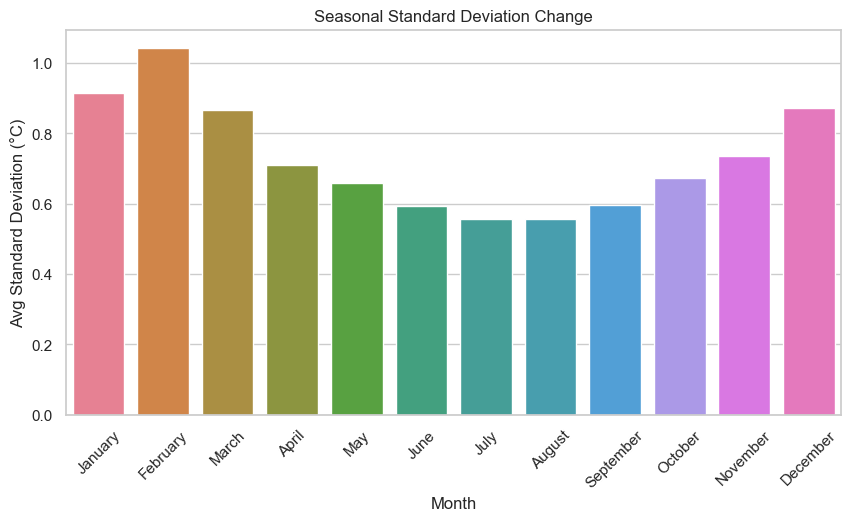

In [ ]:
seasonal_std = df_std_melted.groupby("Months")["Standard Deviation"].mean()
seasonal_std = seasonal_std.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_std.to_csv('Described_parts/globalStdChangeByMonth.csv',index_label='Month')
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_std.index, y=seasonal_std.values, hue=seasonal_std.index)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Avg Standard Deviation (°C)")
plt.title("Seasonal Standard Deviation Change")
plt.show()


## Geographical analysis

### Trends in some areas

In [ ]:
top_areas = list(dict(tcm).keys())[:20]
bottom_areas = list(dict(tcm).keys())[-20:]
selected = pd.Series(top_areas + bottom_areas)
selected_areas = df_temp_melted[df_temp_melted["Area"].isin(selected)]

df_geog = selected_areas.groupby(["Area", "Year"]).mean('Temperature Change')
del df_geog['Months Code'], df_geog['Area Code']
df_geog.to_csv('Described_parts/tTopAreasChangeByAreaAndYear.csv')
df_geog.head(5)

Temperature Change
Area       Year                    
Antarctica 1961            0.169000
           1962           -0.285000
           1963            0.301667
           1964           -0.389417
           1965           -0.084417

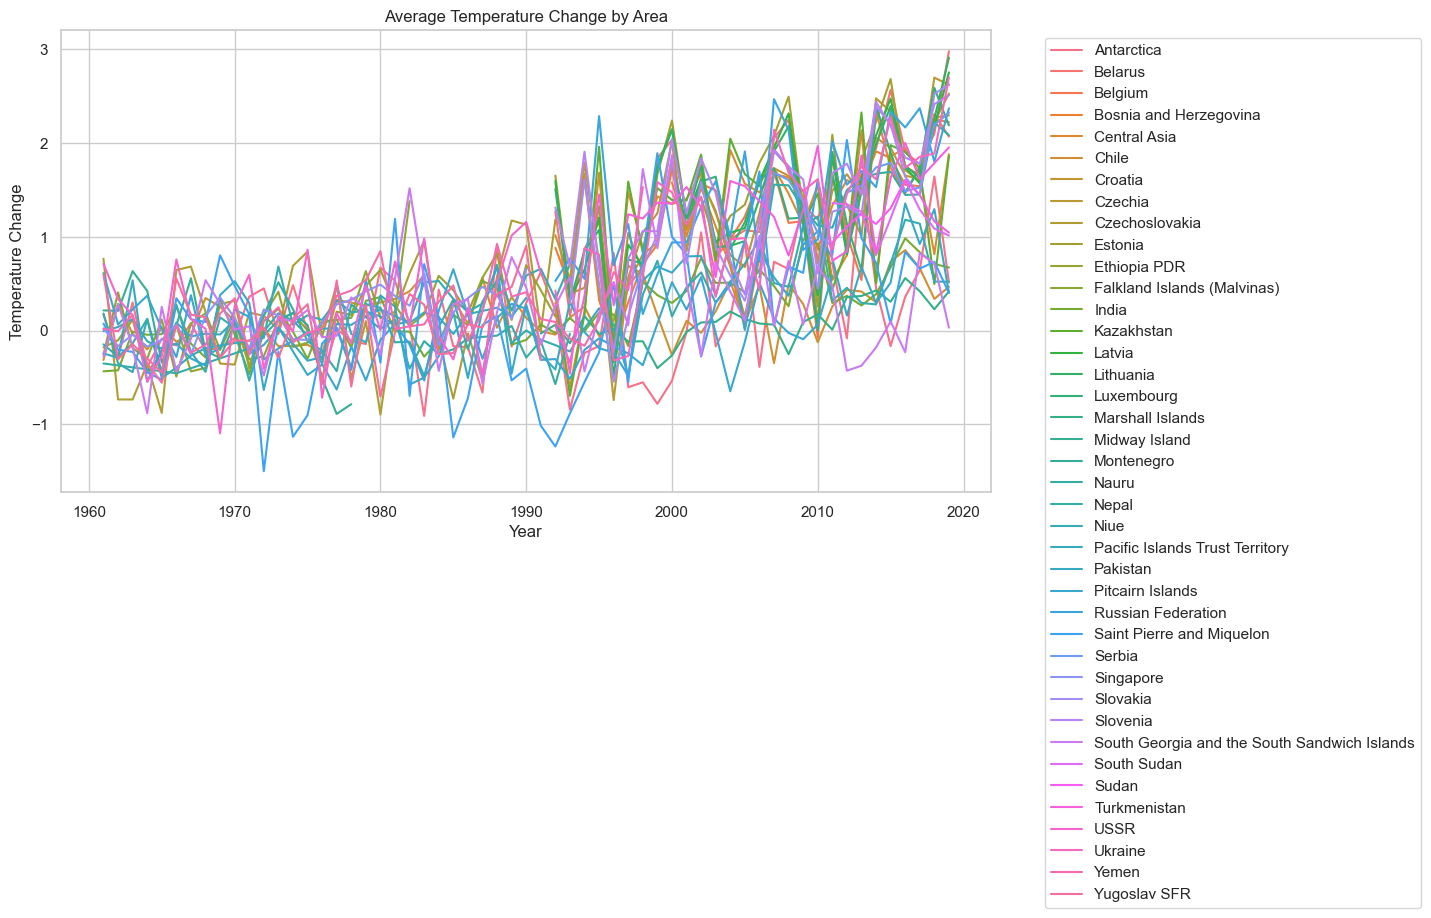

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_geog, x="Year", y="Temperature Change", hue="Area")
plt.title("Average Temperature Change by Area")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Geographical map of temperature change within years

In [ ]:
def plot_heatmap(year : int) -> object:
    '''
    This function helps to plot a heatmap
    '''
    
    year_col = f'Y{year}'
    
    if year_col not in df_temp.columns:
        print(f"Data for year {year} not available")
        return
    
    fig = px.choropleth(df_temp,
                        locations = 'Area',
                        locationmode = 'country names',
                        color = year_col,
                        hover_name = 'Area',
                        color_continuous_scale = 'RdBu_r',
                        title = f'Geo map of temperature change in {year}'
    )
    fig.update_layout(geo = dict(showcoastlines = True))
    clear_output(wait = True)
    display(year_slider)
    
    fig.show()


years = list(set(df_temp_melted['Year']))
year_slider = widgets.IntSlider(value = years[-1],
                                min = min(years),
                                max = max(years),
                                step = 1,
                                description = 'Choose year:',
                                style = {'handle_color': '#32CD32'}
)

widgets.interactive(plot_heatmap, year = year_slider)
display(year_slider)
plot_heatmap(year_slider.value)
year_slider.observe(lambda change: plot_heatmap(change['new']), names = 'value')

IntSlider(value=2019, description='Choose year:', max=2019, min=1961, style=SliderStyle(handle_color='#32CD32'…

### Most and least affected areas

In [ ]:
area_temp_change = pd.read_csv('Described_parts/tempAreaMeanTierList.csv')
most_affected = area_temp_change.nlargest(5, "Temperature Change")
least_affected = area_temp_change.nsmallest(5, "Temperature Change")
print('Most affected areas:')
most_affected

Most affected areas:


,Area,Temperature Change
0,Serbia,1.521940
1,Luxembourg,1.494692
2,Montenegro,1.493042
3,Estonia,1.462247
4,Slovenia,1.434408


In [ ]:
print("Least affected areas:")
least_affected

Least affected areas:


,Area,Temperature Change
283,Nauru,-0.115031
282,Pitcairn Islands,-0.018991
281,Midway Island,0.010874
280,Yugoslav SFR,0.019089
279,Falkland Islands (Malvinas),0.023366


### Correlation between temperature change and geographic areas(By calculating the correlation ratio)

In [ ]:
categories=np.asarray(dtad['Area'])
values=np.asarray(dtad['mean'])
ssw=0
ssb=0
all_mean=np.mean(values)
for area in np.unique(categories):
    gv=values[categories==area]
    gm=np.mean(gv)
    ssw+=np.sum((gv-gm)**2)
    ssb+=len(gv)*(gm-all_mean)**2
total_variance=ssw+ssb
cor_ratio=np.sqrt(ssb/total_variance)
print(f'Correlation Ratio (η): {cor_ratio}') # The closer to 1,the stronger correlation they have



Correlation Ratio (η): 1.0


#### So there is strong correlation between temperature change and geographic areas

### Find unusual years with extreme temperature deviation(With the IQR method)

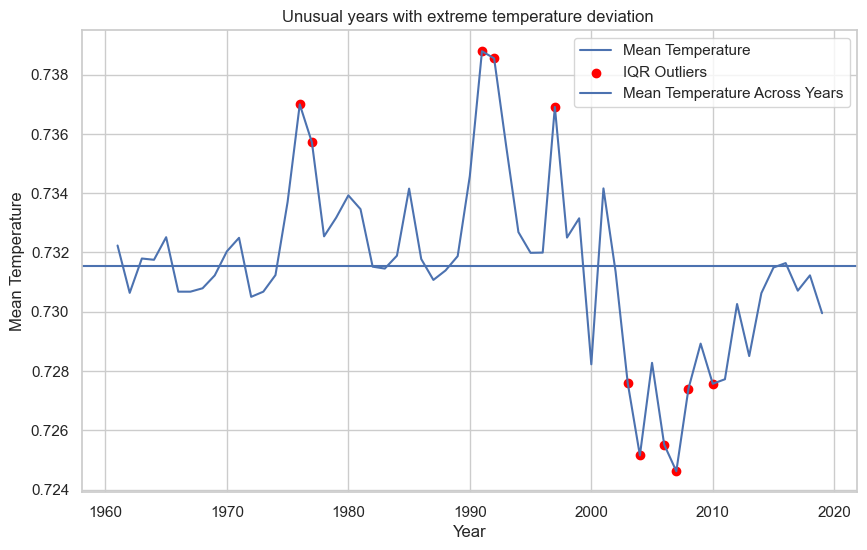

In [ ]:
Q1=dsyd['mean'].quantile(0.25)
Q3 = dsyd['mean'].quantile(0.75) 
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dsyd['is_outlier'] = (dsyd['mean'] < lower_bound) | (dsyd['mean'] > upper_bound)
outliers = dsyd[dsyd['is_outlier']]
outliers
plt.figure(figsize=(10, 6))
plt.plot(dsyd['Year'], dsyd['mean'], label='Mean Temperature')
plt.scatter(outliers['Year'], outliers['mean'], color='red', label='IQR Outliers')
plt.axhline(y=dsyd['mean'].mean(),label='Mean Temperature Across Years')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.title('Unusual years with extreme temperature deviation ')
plt.legend()
plt.show()


## Scatter std to temp

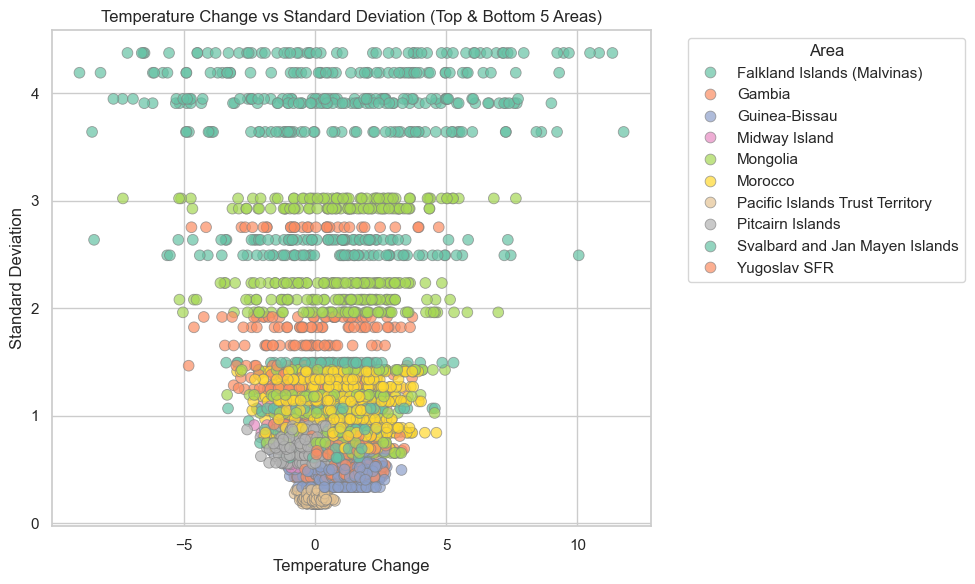

In [ ]:
df_std_to_tem = pd.merge(
    df_temp_melted,
    df_std_melted,
    on=['Area Code', 'Area', 'Months Code', 'Months', 'Year']
)
df_std_to_tem = df_std_to_tem.dropna()

df_std_to_tem.to_csv('Described_parts/globalStdToTem.csv')
tcm1 = df_std_to_tem.groupby('Area')["Temperature Change"].mean().sort_values(ascending=False)
top5_areas = list(tcm1.index[:5])
bottom5_areas = list(tcm1.index[-5:])
selected_areas = top5_areas + bottom5_areas


df_selected = df_std_to_tem[df_std_to_tem["Area"].isin(selected_areas)]


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_selected,
    x='Temperature Change',
    y='Standard Deviation',
    hue='Area',
    palette='Set2',         
    s=60,                   
    alpha=0.7,             
    edgecolor='gray'       
)

plt.title('Temperature Change vs Standard Deviation (Top & Bottom 5 Areas)')
plt.xlabel('Temperature Change')
plt.ylabel('Standard Deviation')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()





## Temp change within years among areas